In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data',index_col = 0) #Set index_col=0 to use the first column as the index.

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
salient_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
df_scaled = pd.DataFrame(salient_features,columns=df.columns[:-1])

In [17]:
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['TARGET CLASS'], test_size=0.3, random_state=101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
predictions = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))
#True Negative , False Negative
#False Positive, True Positive
#Below 151 observation for 0 is correct and 8 prediction for 0 is incorrect
#Below 15 predictions for 1 is incorrect and 126 are correct

[[151   8]
 [ 15 126]]


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [40]:
error_data = []
k_values = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    k_values.append(i)
    error_data.append(np.mean(y_test != predict_i))

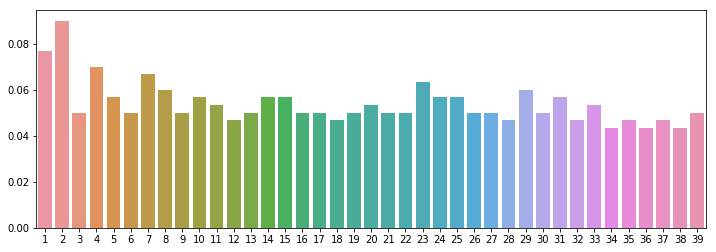

In [44]:
plt.figure(figsize = (12,4))
sns.barplot(k_values,error_data)
# k_values

In [46]:
k_best = error_data.index(min(error_data))

In [47]:
knn_new = KNeighborsClassifier(n_neighbors=k_best)

In [48]:
knn_new.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=33, p=2,
           weights='uniform')

In [49]:
predict_new = knn_new.predict(X_test)

In [50]:
#Evaluate prediction

In [51]:
print(classification_report(y_test,predict_new))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.94      0.95      0.94       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [52]:
print(confusion_matrix(y_test,predict_new))

[[150   9]
 [  7 134]]
